In [2]:
import wandb
import pickle
import numpy as np
from MountainCarEnv import MountainCarEnv
from QLearning import QLearning

In [3]:
qLearningCar = QLearning("rgb_array")

In [1]:
iterations = 20000
alpha = 0.1 #learning_rate: variacion permitida
epsilon = 0.5 #exploration_rate:  más grande mas exploracion
gamma = 0.95  #discount_factor: futuro - ¿¿¿learning rate???? - mas bajo mas greedy
max_exploration_rate = 1.0
min_exploration_rate = 0.01
exploration_decay_rate = 0.001
min_eps_before_decay = 1000
initial_alpha = 0.5
final_alpha = 0.1

In [5]:
divPos = 20
divVel = 20

In [6]:
qLearningCar.discretizar(divPos, divVel) #pasar variables de discretizacion desde ipynb

In [10]:
iterations_per_run = 20000
iterations_total = 0
best_score = -133
pickle_count = 0
meta_iteration_count = 0

In [11]:
while(meta_iteration_count < 20):
    iterations_total = 0
    qLearningCar = QLearning("rgb_array")
    qLearningCar.discretizar(divPos, divVel)
    while(iterations_total < 20000):
        Q, initial_state_Q_list, epsilon_decay_list = qLearningCar.qLearning_bajar_epsilon_1(iterations_per_run, alpha, epsilon, gamma, min_eps_before_decay)
        test_value = qLearningCar.execute(50)
                
        if(test_value > best_score):
            best_score = test_value
            pickle_out = open('Q_disc_20_20_' + str(test_value) +'.pkl', 'wb')
            pickle.dump(Q, pickle_out)
            pickle_out.close()
            pickle_count += 1
            best_Q = Q       
                    
    iterations_total += iterations_per_run
    print(iterations_total)
    print("V(Q) = " + str(test_value))
  
    meta_iteration_count += 1

In [ ]:
import matplotlib.pyplot as plt
plt.axhline(color='black')
my_plot = plt.plot(range(0, iterations), qLearningCar.alpha_decay_list, color='blue')

In [18]:
data = [[x, y] for (x, y) in zip(range(0, iterations), qLearningCar.alpha_decay_list)]
table = wandb.Table(data=data, columns = ["x", "y"])
wandb.log(
    {"Learning rate decay" : wandb.plot.line(table, "x", "y",
           title="Learning rate decay")})

In [21]:
#best_average = -500

In [ ]:
best_Q

In [22]:
average = qLearningCar.execute(100)
if(average > best_average):
    best_average = average
    best_Q = Q

In [23]:
best_average

-217.67

In [12]:
qLearningCar.rewards

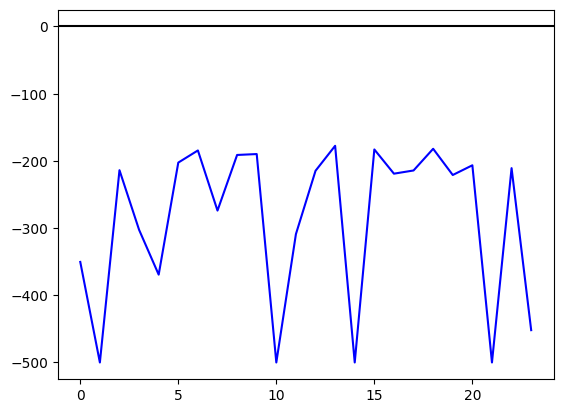

In [13]:
import matplotlib.pyplot as plt
plt.axhline(color='black')
my_plot = plt.plot(range(0, len(qLearningCar.rewards)), qLearningCar.rewards, color='blue')

In [14]:
data = [[x, y] for (x, y) in zip(range(0, len(qLearningCar.rewards)), qLearningCar.rewards)]
table = wandb.Table(data=data, columns = ["x", "y"])
wandb.log(
    {"All Qs" : wandb.plot.line(table, "x", "y",
           title="All Qs")})

In [15]:
#tendria que subir la plot
wandb.log({"all rewards": qLearningCar.rewards})

In [17]:
wandb.log({
    "Iterations third run": iterations_total 
})

In [18]:
#finished uploading
wandb.finish()

Iterations third run,▁
Iterations third run,240000
